### Synthetic data to compute confusion matrix 
This notebook generates random synthetic data, runs cpDetect on it and then quantifies the confusion matrix.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cpdetect import cpDetector
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import *
try:
    import cPickle as pickle
except:
    import pickle

In [2]:
# Generate random trajectories
sizes = np.random.randint(10, 1000, 20)
means = np.random.uniform(low=7.0, high=9.0, size=60)
variances = np.random.uniform(low=0.2, high=0.3, size=20)
means.sort()
mean_2 = means[0::3]
means_2 = np.delete(mean_2, [1] )
samples = [np.random.lognormal(mean_2[i], variances[i], sizes[i]) for i in range(len(mean_2))]
chunks = np.random.randint(5, 25, 100)

In [9]:
trajs = []
step = {}
tru_ts = {}
choice = []
for i, chunk in enumerate(chunks):
    choices = (np.random.choice(range(20), size=chunk))
    diff = np.diff(choices)
    choices = np.delete(choices, np.where(abs(diff) <= abs(3)))  
    choice.append(choices)
    ts = [sizes[c] for c in choices]
    tru_ts['traj_{}'.format(str(i))] = np.cumsum(ts)[:-1]
    to_concat = tuple(samples[c] for c in choices)
    trajs.append(np.concatenate(to_concat))
    step_function = tuple(np.exp(mean_2[c])*np.ones(sizes[c]) for c in choices)
    step['traj_{}'.format(str(i))] = np.concatenate(step_function)

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


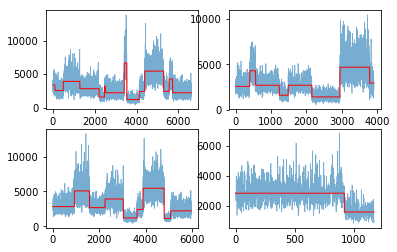

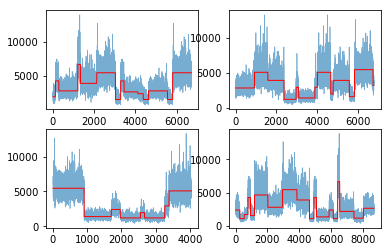

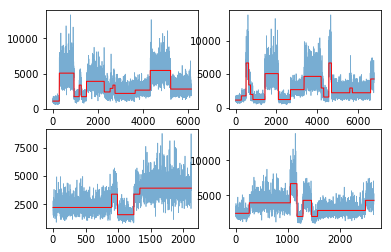

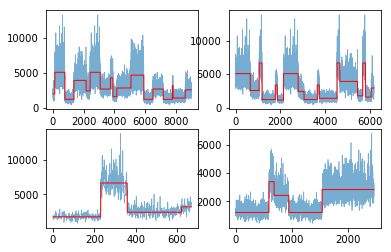

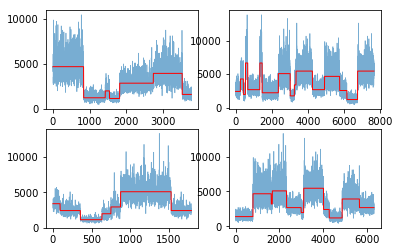

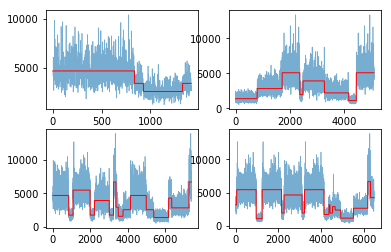

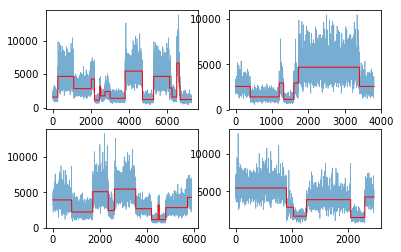

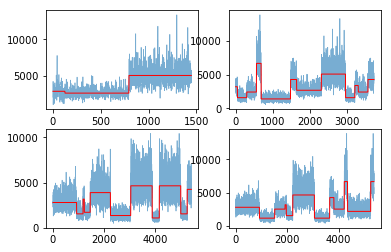

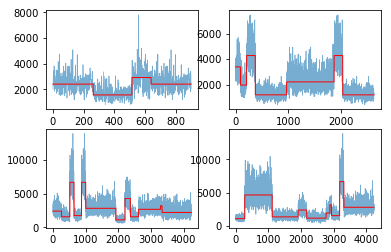

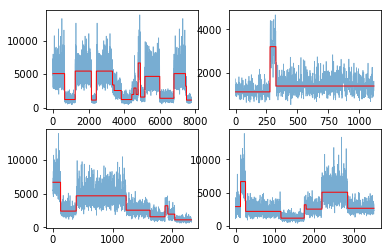

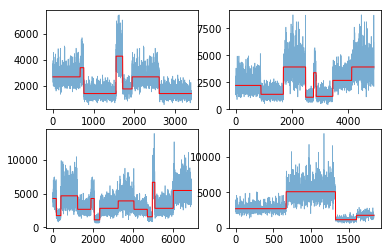

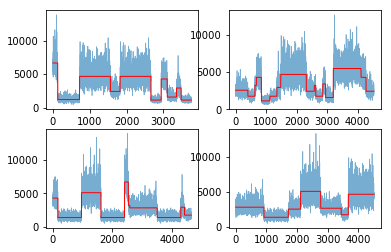

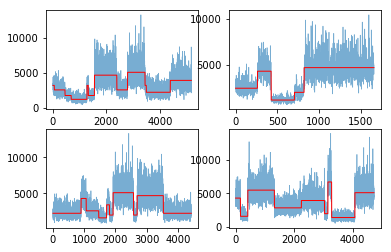

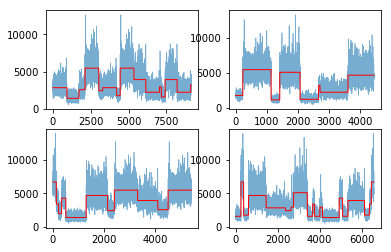

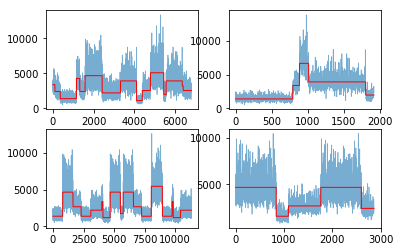

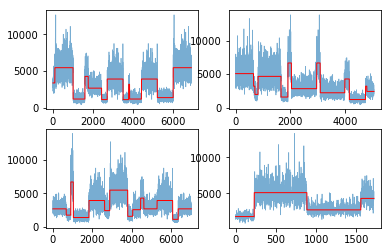

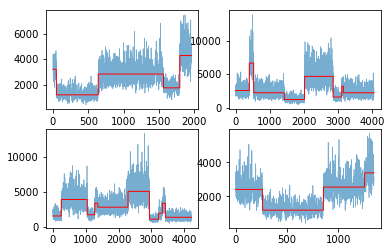

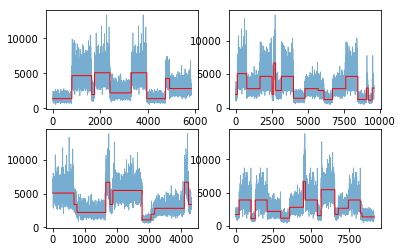

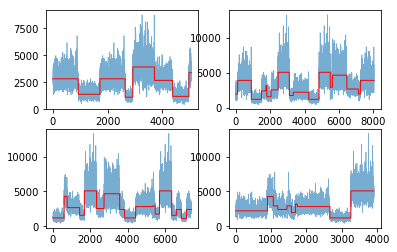

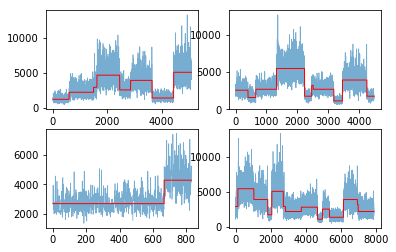

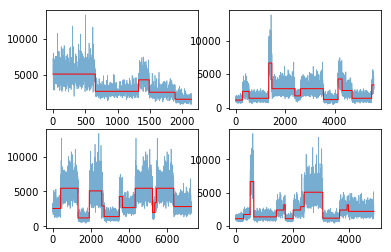

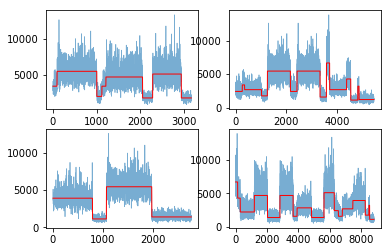

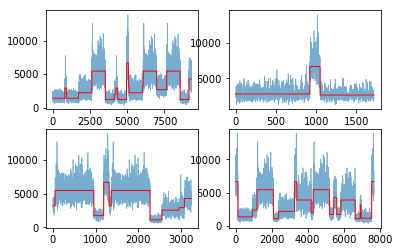

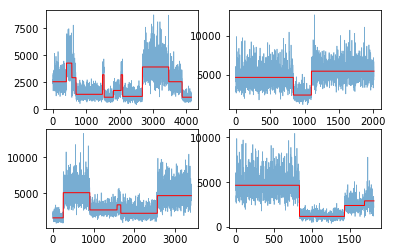

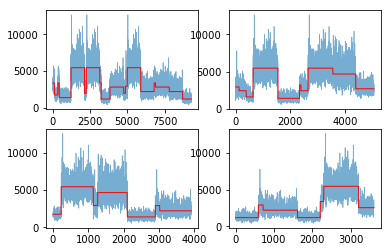

In [222]:
filename = 'synthetic.pdf'
with PdfPages(filename) as pdf:
    for i in range(25):
        fig = plt.figure()
        for j in range(4):
            ax = fig.add_subplot(2, 2, j+1)
            ax.plot(trajs[4*i + j], alpha=0.6, linewidth=0.7)
            ax.plot(step['traj_{}'.format(4*i+j)], color='red', linewidth=1.0)
        pdf.savefig(bbox_inches='tight')

In [229]:
np.save(file='synthetic_trajs.np', arr=trajs)
pickle.dump(tru_ts, open('true_ts.pickle','wb'))
pickle.dump(step, open('step_synthetic.pickle', 'wb'))